In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os
from src.utils_py.io.gro import read_gro, write_gro
from src.utils_py.gro.Structure import Structure

In [31]:
def apply_pbc(points, L=5):
    points_pbc = points.copy()
    half_box_size = L / 2

    idx_pbc = abs(points_pbc - half_box_size) >= half_box_size
    points_pbc -= np.sign(points_pbc) * L * idx_pbc

    return points_pbc

In [35]:
def get_center(points):
    return np.average(points, axis=0)

In [91]:
def get_center_pbc(points, L=5):
    phi = 2 * np.pi * points.copy() / L
    R = L / 2 / np.pi
    points_circ = R * np.vstack((np.cos(phi[:, 0]), np.sin(phi[:, 0]), np.cos(phi[:, 1]), np.sin(phi[:, 1])))
    points_center = np.average(points_circ, axis=1)
    phi_center = np.arctan(points_center[1::2] / points_center[0::2]) + np.pi * (points_center[0::2] < 0)
    print(phi_center)
    # r_center = np.sqrt(points_center[0::2]**2 + points_center[1::2]**2)
    points_pbc = phi_center * L

    return points_pbc


In [68]:
arr = np.average(np.vstack((np.cos(points[:, 0]), np.sin(points[:, 0]), np.cos(points[:, 1]), np.sin(points[:, 1]))), axis=1)
arr

array([-0.10389613,  0.22701718,  0.81612092,  0.33658839])

In [115]:
points = np.array([
    [0, 0],
    [1, 1],
    [2, 0],
    [3, 1],
    [4, 0]
])

In [110]:
points = points - 0.5

In [74]:
points = apply_pbc(points)

[3.14159265 0.48401997]


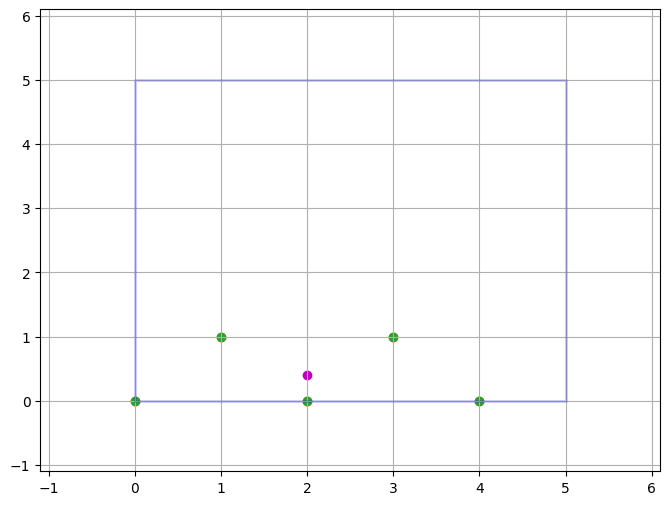

In [116]:
plt.figure(figsize=(8, 6))
plt.grid()
plt.xlim(-1.1, 6.1)
plt.ylim(-1.1, 6.1)
plt.plot([0, 0, 5, 5, 0], [0, 5, 5, 0, 0], linewidth=2, color='b', alpha=0.2)
plt.scatter(points[:, 0], points[:, 1], color='tab:orange')
plt.scatter(apply_pbc(points)[:, 0], apply_pbc(points)[:, 1], color='tab:green')
# print(get_center_pbc(points))
plt.scatter(*get_center_pbc(apply_pbc(points)), color='r')
plt.scatter(*get_center(apply_pbc(points)), color='m')

[[0.         0.        ]
 [1.25663706 1.25663706]
 [2.51327412 0.        ]
 [3.76991118 1.25663706]
 [5.02654825 0.        ]]
[[0.         0.        ]
 [1.25663706 1.25663706]
 [2.51327412 0.        ]
 [3.76991118 1.25663706]
 [5.02654825 0.        ]]


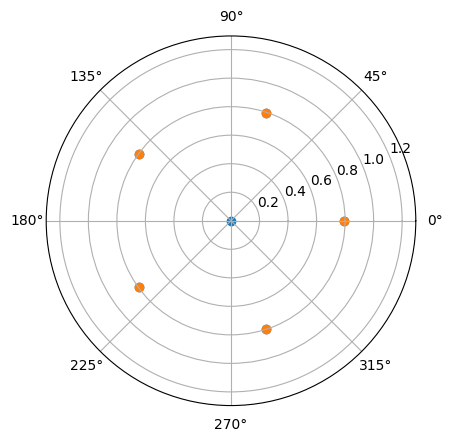

In [117]:
L = 5
phi = 2 * np.pi * points / L
print(phi)
phi_pbc = 2 * np.pi * apply_pbc(points) / L
print(phi_pbc)
R = L / 2 / np.pi

points_circ = R * np.vstack((np.cos(phi_pbc[:, 0]), np.sin(phi_pbc[:, 0]), np.cos(phi_pbc[:, 1]), np.sin(phi_pbc[:, 1])))
points_center = np.average(points_circ, axis=1)
phi_center = np.arctan(points_center[1::2] / points_center[0::2]) + np.pi * (points_center[0::2] < 0)
r_center = np.sqrt(points_center[0::2]**2 + points_center[1::2]**2)

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.scatter(phi[:, 0], R * np.ones_like(phi[:, 0]), color='tab:blue')
ax.scatter(phi_pbc[:, 0], R * np.ones_like(phi_pbc[:, 0]), color='tab:orange')
ax.scatter(phi_center[0], r_center[0])
ax.set_rmax(R + 0.5)
ax.grid(True)

plt.show()

---